In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering


In [2]:


# Load the Excel file
fpce = r"celegans277.mat"

dm_ce = scipy.io.loadmat(fpce)
dm_ce



{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 07 19:27:20 2006',
 '__version__': '1.0',
 '__globals__': [],
 'celegans277matrix': array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(277, 277), dtype=uint8),
 'celegans277positions': array([[ 1.10677686e-02,  5.90280993e-03],
        [ 1.42064198e-02,  2.20444444e-03],
        [ 1.62327273e-02,  5.65685949e-03],
        [ 1.49412346e-02,  9.30765433e-03],
        [ 8.23933884e-02, -9.83801676e-04],
        [ 8.32790124e-02, -3.18419751e-03],
        [ 8.26393388e-02, -1.30353719e-02],
        [ 8.32790124e-02, -1.15120988e-02],
        [ 8.63285950e-02, -2.70545452e-03],
        [ 8.64632099e-02, -9.79753066e-04],
        [ 6.51768595e-02,  9.34611568e-03],
        [ 5.90301234e-02,  1.15120988e-02],
        [ 7.54409877e-02,  6.12345676e-03],
  

In [5]:

og_matrix = dm_ce['celegans277matrix']
df_ce = pd.DataFrame(og_matrix)
df_ce

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# --- APPLY K-NEAREST NEIGHBORS ---
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(adj_matrix)
distances, indices = knn.kneighbors(adj_matrix)

# --- PLOT BARPLOT FOR A NEURON ---
neuron = 0  # Change to visualize other neurons
plt.figure(figsize=(10, 5))
sns.barplot(x=indices[neuron], y=distances[neuron])
plt.title(f'Neuron {neuron} - {k} Nearest Neighbors')
plt.xlabel('Neighbor Neuron Index')
plt.ylabel('Distance')
plt.show()



NameError: name 'adj_matrix' is not defined

In [26]:
CE_G = nx.from_numpy_array(dm_ce['celegans277matrix'])
CE_G

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


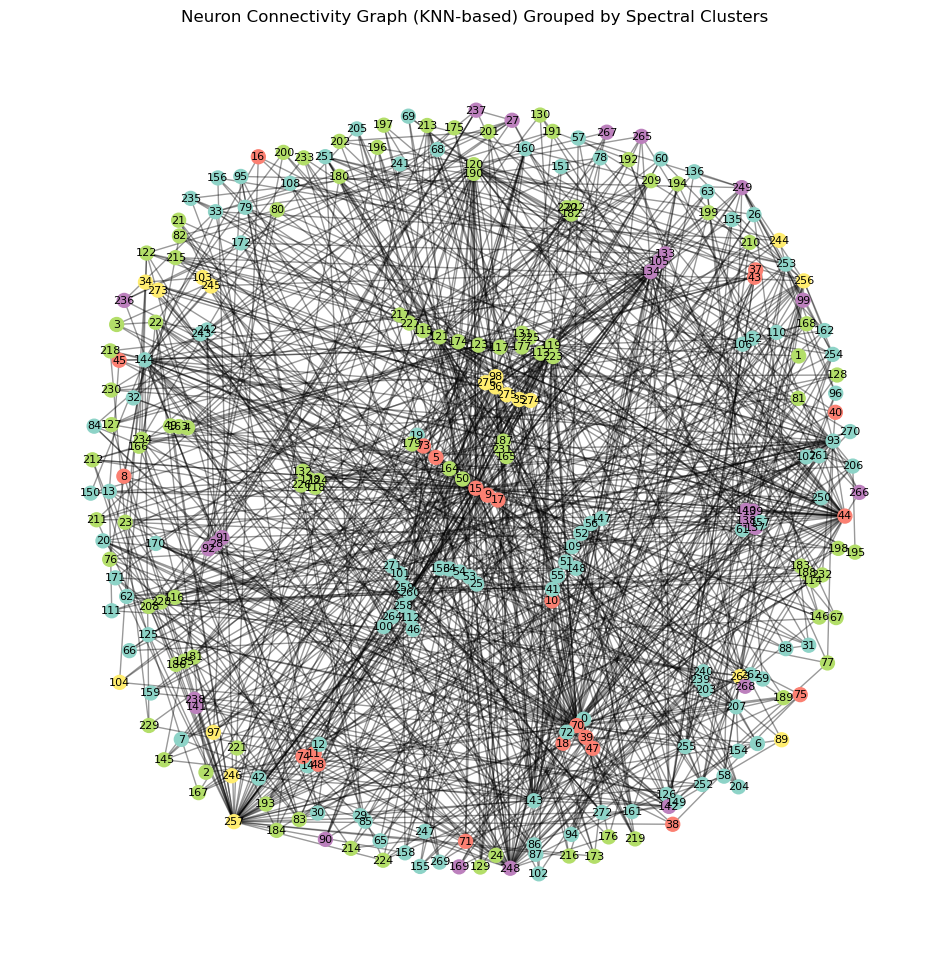

In [27]:
adj_matrix = dm_ce['celegans277matrix']



# --- BUILD KNN GRAPH FROM NEIGHBORHOOD INFO ---
G = nx.Graph()
num_nodes = adj_matrix.shape[0]
G.add_nodes_from(range(num_nodes))

# Add edges only between k-nearest neighbors
for i in range(num_nodes):
    for j in indices[i]:
        if i != j:  # avoid self-loop
            G.add_edge(i, j, weight=adj_matrix[i, j])

# --- CLUSTER NODES USING SPECTRAL CLUSTERING ---
n_clusters = 5
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
knn.
labels = sc.fit_predict(adj_matrix)

# --- PLOT THE NETWORK GRAPH ---
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.Set3, node_color=labels)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Neuron Connectivity Graph (KNN-based) Grouped by Spectral Clusters')
plt.axis('off')
plt.show()

# Coactivation Matrix

In [77]:
file_path_cm = r"Coactivation_matrix.mat"
cm_matrix_data = scipy.io.loadmat(file_path_cm)
coactivation_matrix= cm_matrix_data['Coactivation_matrix']

#OG Dataset
df_cm = pd.DataFrame(coactivation_matrix)
df_cm

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [78]:
coactivation_matrix = cm_matrix_data['Coactivation_matrix']
coordinates_coactivation_matrix = cm_matrix_data['Coord']

# Normalized data - Coactivation Matrix

In [79]:
cm_normalized = StandardScaler().fit_transform(df_cm)
cm_normalized
#Normalized data (Looks horrible)

array([[-0.19362938, 12.05863095,  6.57399598, ..., -0.23853185,
         3.92741639,  5.66310469],
       [10.55825838, -0.17846608,  3.94430869, ..., -0.23853185,
        -0.14477987,  3.80362983],
       [ 7.26488735,  5.01893577, -0.20819832, ...,  2.39670138,
        -0.14477987, -0.2327912 ],
       ...,
       [-0.19362938, -0.17846608,  1.86805518, ..., -0.23853185,
        -0.14477987, -0.2327912 ],
       [ 3.18209073, -0.17846608, -0.20819832, ..., -0.23853185,
        -0.14477987,  5.46803061],
       [ 6.57160337,  5.09289879, -0.20819832, ..., -0.23853185,
         7.74623154, -0.2327912 ]], shape=(638, 638))

# Metodo de codo - Coactivation Matrix

In [80]:
inertia = []
it_per = []

for no_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=no_cluster)
    kmeans.fit(cm_normalized)
    inertia.append(kmeans.inertia_)
    it_per.append(kmeans.n_iter_)

Text(0.5, 1.0, 'Metodo del codo')

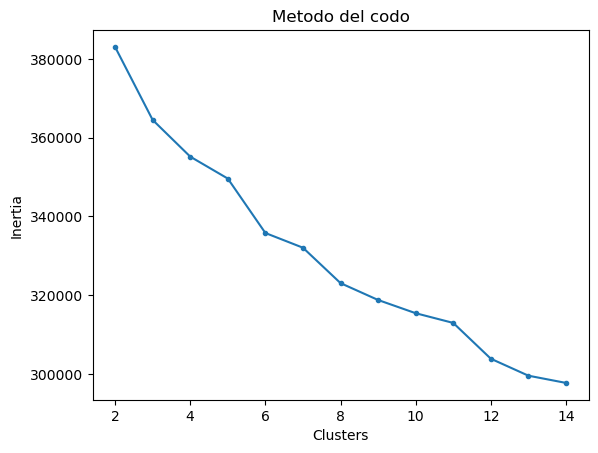

In [81]:
plt.plot(range(2, 15), inertia, '.-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Metodo del codo")

#Idk what is inertia even
#No hay codo

# KMeans - Coactivation Matrix

In [82]:
k = 4
kmeans = KMeans(n_clusters=k).fit(cm_normalized)
kmeans

KMeans(n_clusters=4)

In [83]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 1, 3, 1, 3, 1, 3,
       1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 3, 0, 1, 0, 3, 3, 3, 3, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0,

# Make the graph (Dah)

In [84]:
G = nx.from_numpy_array(coactivation_matrix)
positions = {i: (coordinates_coactivation_matrix[i, 0], coordinates_coactivation_matrix[i, 1]) for i in range(len(coordinates_coactivation_matrix))}

# Draw the graph (Dah)

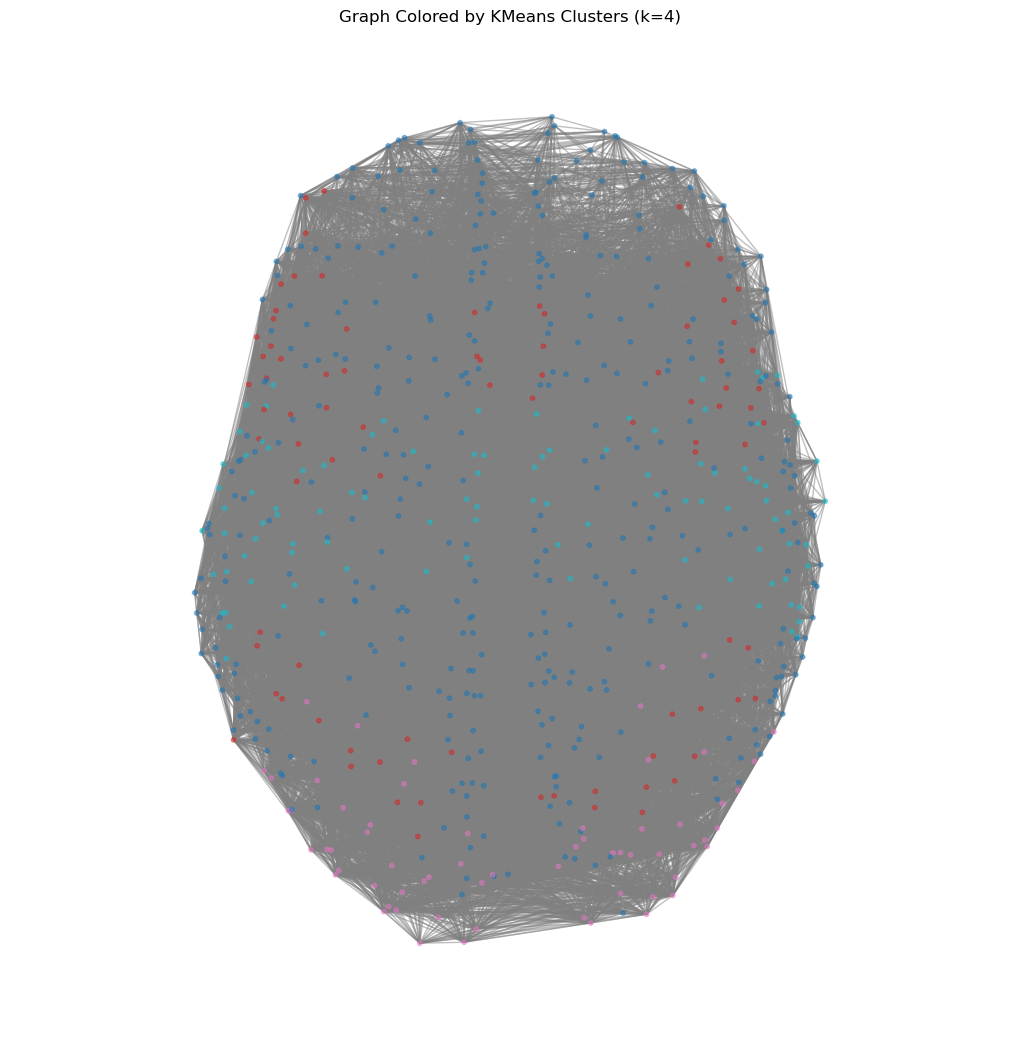

In [86]:
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos=positions,
    node_color=labels,
    node_size=10,
    edge_color='gray',
    alpha=0.5,
    with_labels=False,
    cmap=plt.get_cmap('tab10', k)

)
plt.title(f"Graph Colored by KMeans Clusters (k={k})")
plt.axis('equal')
plt.show()

# Gaussian Mixture - Coactivation Matrix

In [89]:
k = 4
gm_cm = GaussianMixture(n_components=k, random_state=0).fit(cm_normalized)
gm_cm

GaussianMixture(n_components=4, random_state=0)

In [90]:
labels_cm_gaus = gm.predict(coactivation_matrix)
labels_cm_gaus

array([1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1,

# Plot the graph Gaussian Mixture

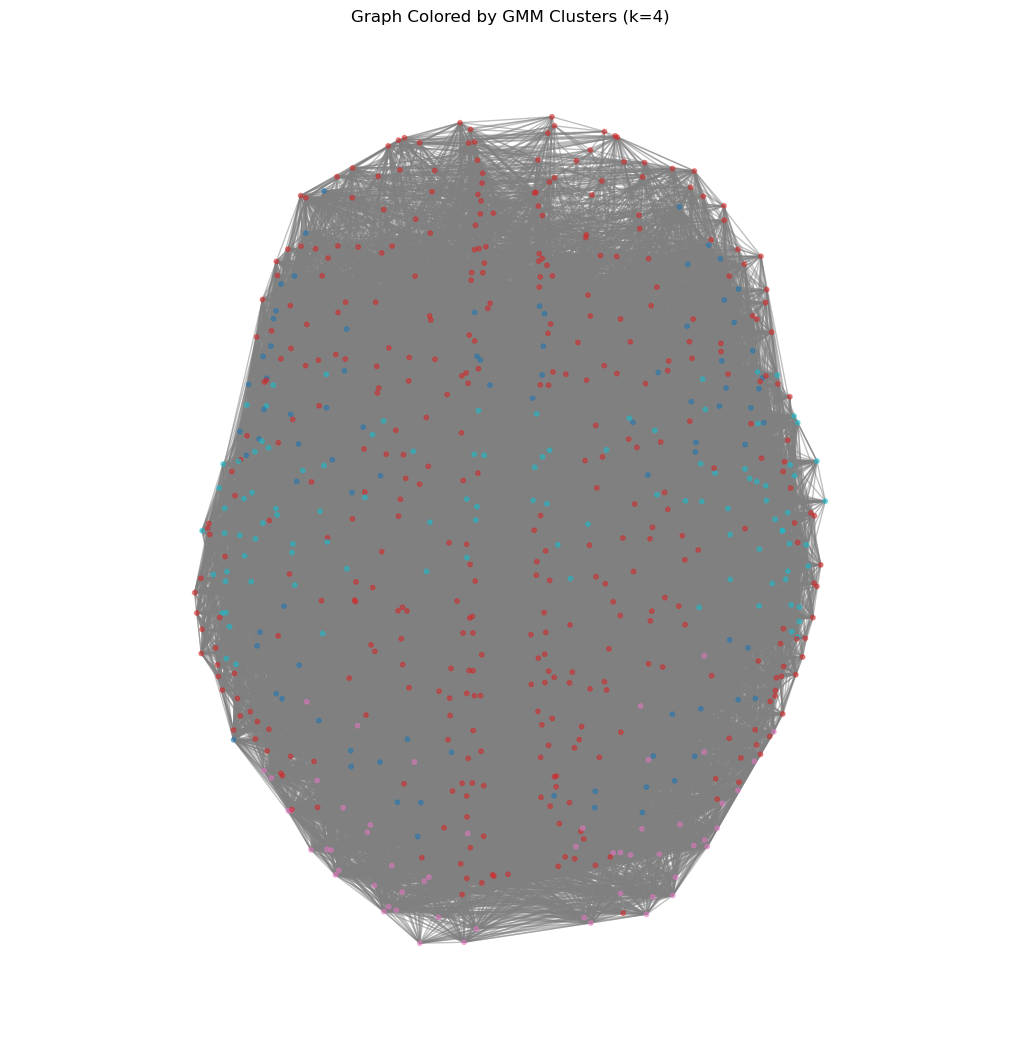

In [91]:
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos=positions,
    node_color=labels_cm_gaus,
    node_size=10,
    edge_color='gray',
    alpha=0.5,
    with_labels=False,
    cmap=plt.get_cmap('tab10', k)
)
plt.title(f"Graph Colored by GMM Clusters (k={k})")
plt.axis('equal')
plt.show()

# Brain tumor

In [105]:
path_bt = r"Brain Tumor.csv"
df_bt = pd.read_csv(path_bt)
df_bt

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [106]:
df_bt_filtered = df_bt.drop(columns=['Image', 'Class', 'Coarseness'])
df_bt_filtered

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


# Normalized data - Brain Tumor

In [107]:
bt_normalized = StandardScaler().fit_transform(df_bt_filtered)
bt_normalized
#Normalized data (Looks horrible also)

array([[-0.51570041, -0.19579009, -0.0331438 , ...,  0.40409983,
        -0.12170857,  1.00071256],
       [-0.12901813,  0.2029431 ,  0.365594  , ...,  1.34545658,
        -0.79918084,  1.26437684],
       [-0.37501262,  0.9257654 ,  0.98467952, ..., -1.64939073,
         0.69370439,  0.85063591],
       ...,
       [ 1.48808151,  0.94239883,  0.99775976, ...,  0.10176566,
         0.21903689, -0.13709518],
       [ 0.67074636,  0.50198829,  0.63500562, ...,  0.00634627,
         0.94127334, -0.56851738],
       [-0.58994208, -0.4925432 , -0.37084695, ...,  0.11789953,
         1.12914289, -0.65138728]], shape=(3762, 12))

In [108]:
kmeans = KMeans(n_clusters=3).fit(X_std)

NameError: name 'X_std' is not defined

# Metodo de codo - Brain Tumor

In [110]:
inertia = []
it_per = []

for no_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=no_cluster)
    kmeans.fit(bt_normalized)
    inertia.append(kmeans.inertia_)
    it_per.append(kmeans.n_iter_)

Text(0.5, 1.0, 'Metodo del codo')

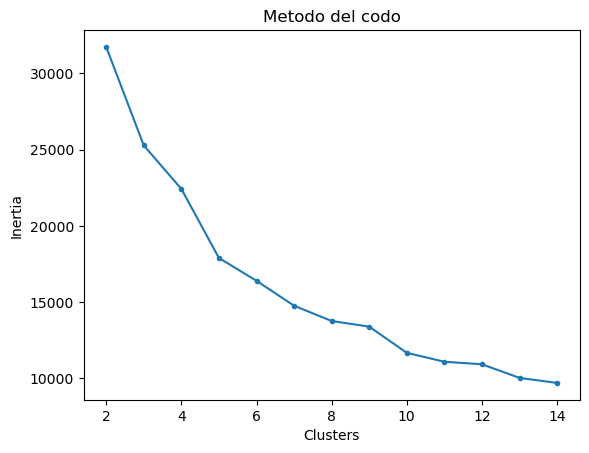

In [111]:
plt.plot(range(2, 15), inertia, '.-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Metodo del codo")

#Idk what is inertia even
#No hay codo

# KMeans - Brain Tumor

In [112]:
k = 2
bt_kmeans = KMeans(n_clusters=k).fit(bt_normalized)
bt_kmeans

KMeans(n_clusters=2)

In [116]:
bt_labels = bt_kmeans.labels_
bt_labels

array([1, 1, 0, ..., 0, 0, 1], shape=(3762,), dtype=int32)

In [117]:
df_bt = pd.DataFrame(data= bt_normalized)
df_bt

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713
1,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377
2,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636
3,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041
4,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335
3758,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377
3759,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095
3760,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517


In [119]:
df_bt['kmeans'] = bt_labels
df_bt

,0,1,2,3,4,5,6,7,8,9,10,11,kmeans
0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,1
1,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,1
2,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,0
3,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,0
4,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,0
3758,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,0
3759,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,0
3760,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,0


In [ ]:

cm_kmeans = confusion_matrix(df_bt['Class'], df_bt, labels=df.Species.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")